# Glitch rises as a test for rapid superfluid coupling in neutron stars -- data comparison
---

In [1]:
#!/usr/bin/env python
"""data_comparison.ipynb: a notebook to recreate results of Graber et al. (2018)"""

__author__ = "Vanessa Graber"
__copyright__ = "Copyright 2018"
__credits__ = ["Vanessa Graber"]
__license__ = "MIT"
__maintainer__ = "Vanessa Graber"
__email__ = "vanessa.graber@mcgill.ca"

This notebook contains code to reproduce part of the results of [Graber et al. (2018)](http://arxiv.org/abs/1804.02706). Whereas the first [notebook](https://github.com/vanessagraber/glitchrises/blob/master/rapid_crust_coupling.ipynb) focused on deriving a predictive model for glitch rises, this notebook concentrates on comparing the model for a range of crust-core couplings ${\cal B}_{\rm core}$ to the first pulse-to-pulse observation of a glitch in the Vela pulsar ([Palfreyman et al. 2018](https://www.nature.com/articles/s41586-018-0001-x)).

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.stats import binned_statistic

In [3]:
%matplotlib inline

# Set `usetex=False' if you do not have LaTeX installed.
rc('text', usetex=True)
rc('font', family='serif')
mpl.rcParams['text.latex.preamble'] = [r"\usepackage{amsmath}"]

In [4]:
colors = ['#990099','#0000CC','#FFA319','#D3D3D3']

## Single-pulse glitch observation
---

### Importing data

Import .csv file for Fig. 1 of Palfreyman et al. (2018), providing timing residuals in nanoseconds between 57734.459988 MJD and 57734.508600 MJD. The authors give the glitch epoch as well as the time of the nulled pulse in MJD.

In [5]:
df_Vela = pd.read_csv("41586_2018_1_MOESM1_ESM.csv", sep=",", skipinitialspace=True)

t_g = 57734.4849906
t_0 = 57734.4849521

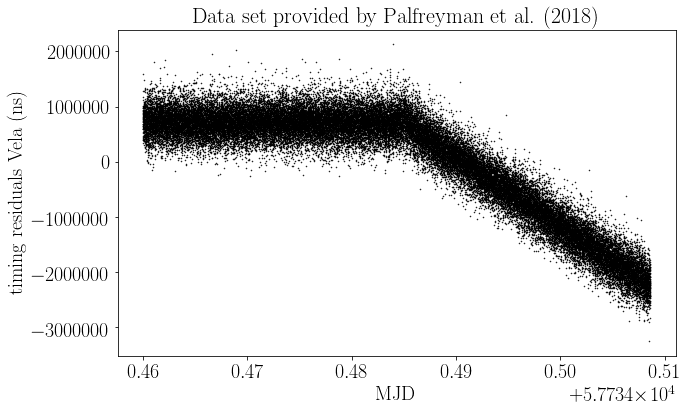

In [6]:
fig = plt.figure()
fig.set_size_inches(10,6)
mpl.rcParams.update({'font.size': 20})
plt.title('Data set provided by Palfreyman et al. (2018)', fontsize=22)

plt.plot(df_Vela['mjd'], df_Vela['residual'], '.', ms=1, color='black')

plt.xlabel(r'MJD')
plt.ylabel(r'timing residuals Vela (ns)')

plt.show()

Residuals before the glitch epoch should form a normalized distribution around zero, assuming the pulsar parameters are well understood. The data is centered vertically by subtracting a constant offset (calculated by fitting a straight line to the data before $t_0$).

In [7]:
offset = np.polyfit(df_Vela['mjd'][df_Vela['mjd'] <= t_0], df_Vela['residual'][df_Vela['mjd'] <= t_0],0)[0]
print(np.round(offset))

718978.0


In [8]:
df_Vela['residual'] = df_Vela['residual'] - offset

To compare with the predicted glitch rise behavior, we transform the residuals into milliseconds, convert the x-axis given in MJD into seconds, and center the data around the glitch epoch $t_g$, so that the glitch occurs at $t=0$:

In [9]:
df_Vela['residual'] = df_Vela['residual']*1e-6
df_Vela['seconds'] = (df_Vela['mjd'] - t_g)*24*3600

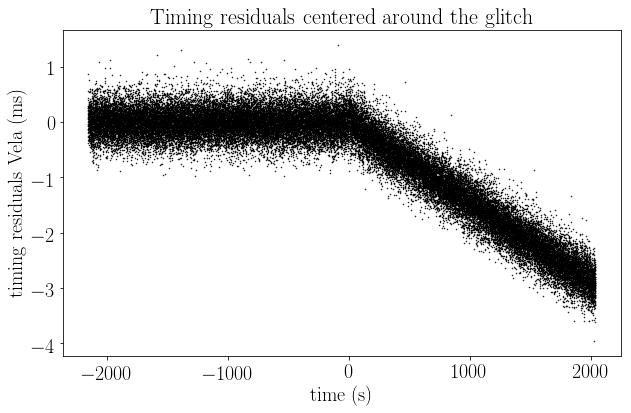

In [10]:
fig = plt.figure()
fig.set_size_inches(10,6)
mpl.rcParams.update({'font.size': 20})
plt.title('Timing residuals centered around the glitch', fontsize=22)

plt.plot(df_Vela['seconds'], df_Vela['residual'], '.', ms=1, color='black')

plt.xlabel(r'time (s)')
plt.ylabel(r'timing residuals Vela (ms)')

plt.show()

### Data binning

As many processes introduce noise into single-pulse observations, the timing residuals are averaged into $2 \, $s bins. Bin edges are choosen so that the center of one bin falls exactly onto $t=0$. Subsequently use scipy's binned_statistic function to calculate the mean within the bins and assign the mean values to the bin centers.

In [11]:
bin_width = 2

In [12]:
edges = np.append(np.arange(np.round(df_Vela['seconds'][0]) + bin_width/2 , 0, bin_width),
                  np.arange(0 + bin_width/2, np.round(df_Vela['seconds'].iloc[-1]), bin_width))

In [13]:
Vela_bin_means, bin_edges, binassign = binned_statistic(df_Vela['seconds'],
                 df_Vela['residual'], statistic='mean', bins=edges)

In [14]:
bin_center = bin_edges[:-1] + (bin_edges[1:] - bin_edges[:-1])/2

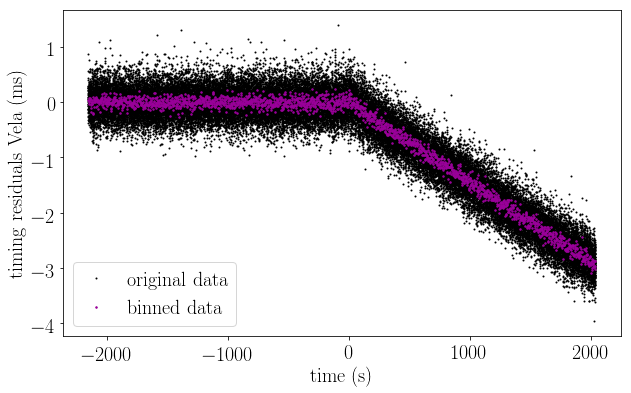

In [15]:
fig = plt.figure()
fig.set_size_inches(10,6)
mpl.rcParams.update({'font.size': 20})

plt.plot(df_Vela['seconds'], df_Vela['residual'], '.', ms=2, label='original data', color='black')
plt.plot(bin_center, Vela_bin_means, '.', ms=3, label='binned data', color=colors[0])

plt.xlabel(r'time (s)')
plt.ylabel(r'timing residuals Vela (ms)')

plt.legend(loc=3, handlelength=1.5, fontsize=20);

plt.show()

## Comparison
---

### Fiducial crust-core coupling

Import the timing residuals corresponding to the glitch rise predictions for the fiducial crust-core coupling value $\mathcal{B}_{\rm core} \approx 5 \times 10^{-5}$. Note that the residuals are calculated for a $1 \, $s time step. To allow comparison with the $2\, $s binned data set, select every other row:

In [16]:
df_model_residuals_fiducial = pd.read_csv('model_residuals_Bcore5e-5.txt', sep='&')
df_model_residuals_fiducial = df_model_residuals_fiducial[::2]
t = df_model_residuals_fiducial['t'].values

In [17]:
df_model_residuals_fiducial.head()

,$10^{-1}$,$10^{-2}$,$10^{-3}$,$10^{-4}$,(A),(B),(C),t
0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.0
2,-0.038362,-0.035733,-0.009584,-0.001099,-0.017478,-0.014546,-0.016926,2.0
4,-0.069871,-0.068308,-0.026283,-0.003334,-0.043296,-0.035977,-0.035624,4.0
6,-0.095852,-0.095303,-0.045870,-0.006400,-0.069557,-0.058106,-0.053012,6.0
8,-0.117372,-0.117712,-0.065976,-0.010070,-0.093545,-0.078862,-0.068669,8.0


In [18]:
label_x = [r'$x$', r'$10^{-1}$', r'$10^{-2}$', r'$10^{-3}$', r'$10^{-4}$', r'(A)', r'(B)', r'(C)']

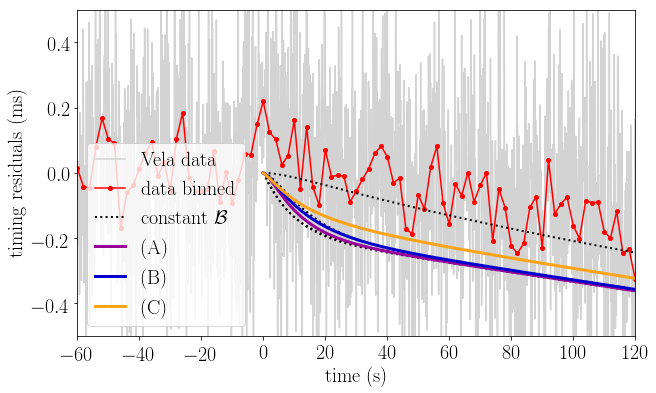

In [19]:
fig = plt.figure()
fig.set_size_inches(10,6)
mpl.rcParams.update({'font.size': 20})

plt.plot(df_Vela['seconds'], df_Vela['residual'], '-', label='Vela data', color=colors[3])
plt.plot(bin_center, Vela_bin_means, '-o', label='data binned', ms=4, color='red')

plt.plot(t, df_model_residuals_fiducial[label_x[1]], ':', label=r'constant $\mathcal{B}$', 
         linewidth=2, color='black')

for i in range(1,4):
    plt.plot(t, df_model_residuals_fiducial[label_x[i+1]], ':', label='_nolegend_', 
             linewidth=2, color='black')
    
for i in range(4,7):
    plt.plot(t, df_model_residuals_fiducial[label_x[i+1]], '-', label=label_x[i+1], 
             linewidth=3, color=colors[i-4])

plt.xlim(-60,120)
plt.ylim(-0.5,0.5)
plt.xlabel(r'time (s)')
plt.ylabel(r'timing residuals (ms)')

plt.legend(loc=3, handlelength=1.5, fontsize=20);

plt.show()

### Phase shift

The data is shifted vertically with respect to the predictions. This is included into the model by accounting for a shift in residuals $\Delta t$ at the time of the glitch, motivated by the magnetospheric changes reported by Palfreyman et al. (2018) for the 2016 Vela pulsar glitch.

In [20]:
glitch_position = np.where(bin_center == 0.0)[0][0]
residual_shift = Vela_bin_means[glitch_position]
print(np.round(residual_shift, 2))

0.22


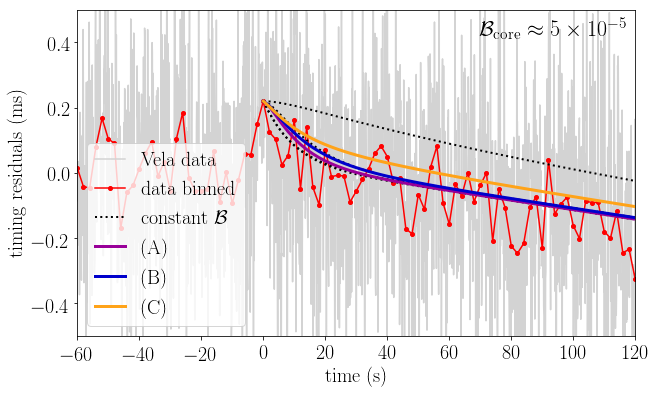

In [21]:
fig = plt.figure()
fig.set_size_inches(10,6)
mpl.rcParams.update({'font.size': 20})

plt.plot(df_Vela['seconds'], df_Vela['residual'], '-', label='Vela data', color=colors[3])
plt.plot(bin_center, Vela_bin_means, '-o', label='data binned', ms=4, color='red')

plt.plot(t, df_model_residuals_fiducial[label_x[1]] + residual_shift, ':', label=r'constant $\mathcal{B}$', 
         linewidth=2, color='black')

for i in range(1,4):
    plt.plot(t, df_model_residuals_fiducial[label_x[i+1]] + residual_shift, ':', label='_nolegend_', 
             linewidth=2, color='black')
    
for i in range(4,7):
    plt.plot(t, df_model_residuals_fiducial[label_x[i+1]] + residual_shift, '-', label=label_x[i+1], 
             linewidth=3, color=colors[i-4])

plt.xlim(-60,120)
plt.ylim(-0.5,0.5)
plt.xlabel(r'time (s)')
plt.ylabel(r'timing residuals (ms)')

plt.annotate(r'${\cal B}_{\rm core} \approx 5 \times 10^{-5}$', 
             xycoords='axes fraction', xy=(0.72,1-0.09), fontsize=22)

plt.legend(loc=3, handlelength=1.5, fontsize=20);

plt.show()

### Cumulative residuals

For comparison also calculate the cumulative sum of the theoretical residuals and compare those to the observed cumulative residuals, only accounting for data after the glitch is initiated. Note that the residual shift $\Delta t$ has been subtracted from the binned data:

In [22]:
df_model_residuals_fiducial_cum = df_model_residuals_fiducial.cumsum()
observed_residuals_cum = (Vela_bin_means[glitch_position:] - residual_shift).cumsum()

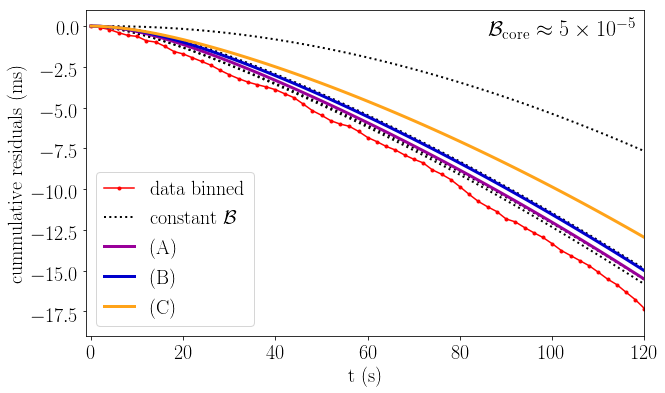

In [23]:
fig = plt.figure()
fig.set_size_inches(10,6)
mpl.rcParams.update({'font.size': 20})

plt.plot(bin_center[glitch_position:], observed_residuals_cum, '-o', label=r'data binned', ms=3, color='red')

plt.plot(t, df_model_residuals_fiducial_cum[label_x[1]], ':', label=r'constant $\mathcal{B}$', 
         linewidth=2, color='black')

for i in range(1,4):
    plt.plot(t, df_model_residuals_fiducial_cum[label_x[i+1]], ':', label='_nolegend_', 
             linewidth=2, color='black')
    
for i in range(4,7):
    plt.plot(t, df_model_residuals_fiducial_cum[label_x[i+1]], '-', label=label_x[i+1], 
             linewidth=3, color=colors[i-4])

plt.xlim(-1,120)
plt.ylim(-19,1)
plt.xlabel(r't (s)')

plt.ylabel(r'cummulative residuals (ms)')
plt.annotate(r'${\cal B}_{\rm core} \approx 5 \times 10^{-5}$', 
             xycoords='axes fraction', xy=(0.72,1-0.09), fontsize=22)

plt.legend(loc=3, handlelength=1.5, fontsize=20);

plt.show()

### Varying the crust-core couplings

Investigate the influence of different core couplings for one crust model (A):

In [24]:
df_model_residuals_comparison = pd.read_csv('model_residuals_Bcore_comparison.txt', sep='&')
Bcore_range = np.array([1e-5, 2e-5, 3e-5, 5e-5, 1e-4, 5e-4, 1e-2])
label_Bcore = ['{:.1e}'.format(x) for x in Bcore_range]

In [25]:
df_model_residuals_comparison = df_model_residuals_comparison[::2]

In [26]:
df_model_residuals_comparison.tail()

,1.0e-05,2.0e-05,3.0e-05,5.0e-05,1.0e-04,5.0e-04,1.0e-02
112,-1.026761,-0.634209,-0.478303,-0.350259,-0.253946,-0.176921,-0.159159
114,-1.033555,-0.637508,-0.481247,-0.353159,-0.256846,-0.179820,-0.162059
116,-1.040187,-0.640775,-0.484187,-0.356060,-0.259745,-0.182720,-0.164958
118,-1.046666,-0.644012,-0.487122,-0.358960,-0.262645,-0.185620,-0.167858
120,-1.052996,-0.647223,-0.490053,-0.361860,-0.265545,-0.188519,-0.170758


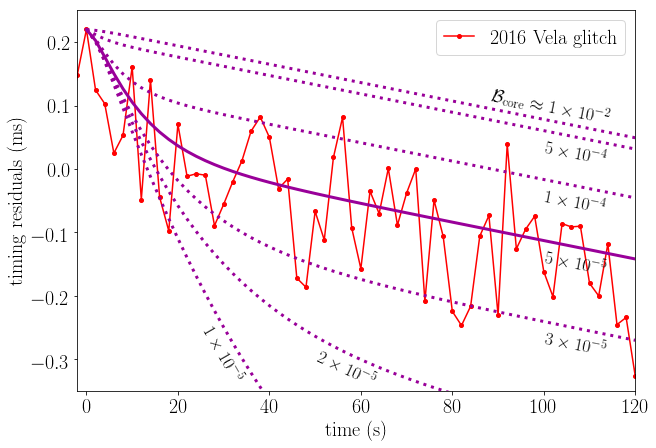

In [27]:
fig = plt.figure()
fig.set_size_inches(10,7)
mpl.rcParams.update({'font.size': 20})

plt.plot(bin_center, Vela_bin_means, '-o', label=r'2016 Vela glitch', ms=4, color='red')

plt.plot(t, df_model_residuals_comparison [label_Bcore[3]] + residual_shift, '-', linewidth=3, color=colors[0],\
        label='_nolegend_')

plt.plot(t, df_model_residuals_comparison[label_Bcore[0]] + residual_shift, ':', linewidth=3, \
         color=colors[0], label='_nolegend_')
plt.plot(t, df_model_residuals_comparison[label_Bcore[1]] + residual_shift, ':', linewidth=3, \
         color=colors[0], label='_nolegend_')
plt.plot(t, df_model_residuals_comparison[label_Bcore[2]] + residual_shift, ':', linewidth=3, \
         color=colors[0], label='_nolegend_')
plt.plot(t, df_model_residuals_comparison[label_Bcore[4]] + residual_shift, ':', linewidth=3, \
         color=colors[0], label='_nolegend_')
plt.plot(t, df_model_residuals_comparison[label_Bcore[5]] + residual_shift, ':', linewidth=3, \
         color=colors[0], label='_nolegend_')
plt.plot(t, df_model_residuals_comparison[label_Bcore[6]] + residual_shift, ':', linewidth=3, \
         color=colors[0], label='_nolegend_')

plt.xlim(-2,120)
plt.ylim(-0.35,0.25)
plt.xlabel(r'time (s)')
plt.ylabel(r'timing residuals (ms)')

plt.annotate(r'$1 \times 10^{-5}$', xy = (25,-0.265), fontsize = 18, rotation=-60)
plt.annotate(r'$2 \times 10^{-5}$', xy = (50,-0.302), fontsize = 18, rotation=-25)
plt.annotate(r'$3 \times 10^{-5}$', xy = (100,-0.273), fontsize = 18,  rotation=-11)
plt.annotate(r'$5 \times 10^{-5}$', xy = (100,-0.146), fontsize = 18,  rotation=-11)
plt.annotate(r'$1 \times 10^{-4}$', xy = (100,-0.049), fontsize = 18, rotation=-11)
plt.annotate(r'$5 \times 10^{-4}$', xy = (100,0.027), fontsize = 18, rotation=-11)
plt.annotate(r'$\mathcal{B}_{\rm core} \approx 1 \times 10^{-2}$', xy = (88,0.102), fontsize = 18, rotation=-11)

plt.legend(loc=1, handlelength=1.5, fontsize=20);

plt.show()